In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 

#df = pd.read_csv("/Users/sean_tsu_/workPlan/data/BTCUSDT-1s-2025-04-16.csv", header=None)
#df_eth = pd.read_csv("/Users/sean_tsu_/workPlan/data/ETHUSDT-1s-2025-04-16.csv", header=None)

def load_symbol_data(symbol):
    df =  pd.read_csv(f"/Users/sean_tsu_/workPlan/data/{symbol}-1s-2025-04-16.csv", header=None)
    df.columns = ["open_time", "open", "high", "low", "close", "volume", "close_time", "quote_volume", "count", "taker_buy_base_volume", "taker_buy_quote_volume", "blank"]

    return df

def calc_return(df, interval = 300):
    ts_return = df.close.pct_change(interval)
    return ts_return

def regress_moving_beta(df, return1, return2):
    df_clean= df.dropna()
    X = df_clean[[return1]]
    y = df_clean[return2]
    regr = LinearRegression()
    regr.fit(X,y)
    return regr.coef_[0]

,BTC_return,ETH_return
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
86395,-0.000257,-0.000938
86396,-0.000257,-0.000938
86397,-0.000306,-0.001045
86398,-0.000376,-0.001064


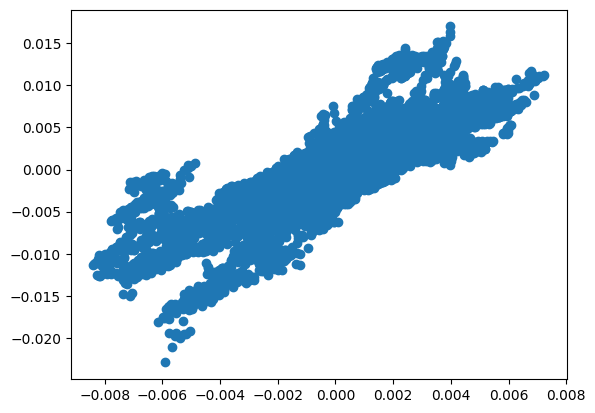

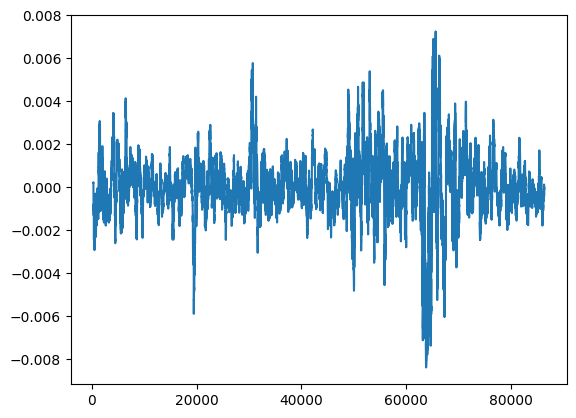

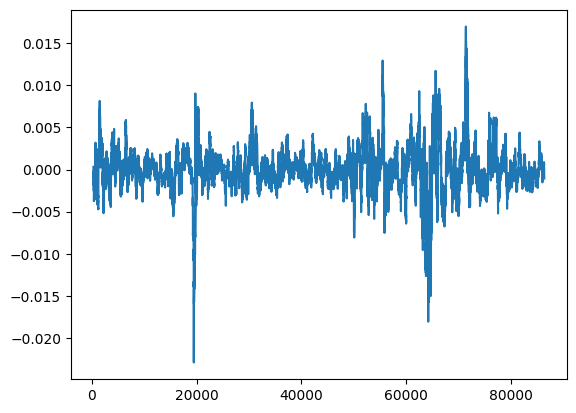

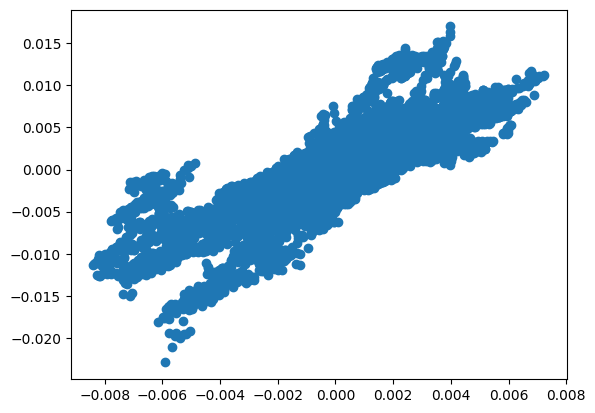

In [ ]:
#df.columns = ["open_time", "open", "high", "low", "close", "volume", "close_time", "quote_volume", "count", "taker_buy_base_volume", "taker_buy_quote_volume", "blank"]

df_BTC = load_symbol_data("BTCUSDT")
df_ETH = load_symbol_data("ETHUSDT")


#df_BTC.head()
if 0:
    df_BTC.close.plot()
    plt.show()
    df_ETH.close.plot()

BTC_return = calc_return(df_BTC, 300)
ETH_return = calc_return(df_ETH, 300)

to_regress = pd.DataFrame({"BTC_return": BTC_return, "ETH_return": ETH_return})
display(to_regress)
plt.scatter(to_regress.BTC_return, to_regress.ETH_return)
plt.show()

BTC_return.plot()
plt.show()
ETH_return.plot()
plt.show()

plt.scatter(BTC_return,ETH_return)
plt.show()


#df.head()
#df.tail(10)

In [ ]:

def regress_moving_beta(df, return1, return2):
    df_clean= df.dropna()
    X = df_clean[[return1]]
    y = df_clean[return2]
    regr = LinearRegression()
    regr.fit(X,y)
    return regr.coef_[0]


regression_coefficient_1 = regress_moving_beta(to_regress, "BTC_return", "ETH_return")

print(regression_coefficient_1)

1.4849463397795846


,open_time,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_base_volume,taker_buy_quote_volume,blank,date_time
date_time,,,,,,,,,,,,,
2025-04-16 00:00:00,1744761600000000,83643.99,83643.99,83636.30,83636.31,0.65377,1744761600999999,54683.517899,109,0.06259,5235.060120,0,2025-04-16 00:00:00
2025-04-16 00:00:01,1744761601000000,83636.30,83636.31,83636.30,83636.30,0.46024,1744761601999999,38492.772888,15,0.21755,18195.079240,0,2025-04-16 00:00:01
2025-04-16 00:00:02,1744761602000000,83636.31,83636.31,83636.30,83636.31,0.03743,1744761602999999,3130.506726,6,0.00170,142.181727,0,2025-04-16 00:00:02
2025-04-16 00:00:03,1744761603000000,83636.30,83636.31,83636.30,83636.30,0.04158,1744761603999999,3477.597410,8,0.00562,470.036062,0,2025-04-16 00:00:03
2025-04-16 00:00:04,1744761604000000,83636.31,83636.31,83621.01,83621.01,0.96199,1744761604999999,80450.685588,247,0.00736,615.563242,0,2025-04-16 00:00:04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-16 23:59:55,1744847995000000,84030.38,84030.38,84030.38,84030.38,0.00000,1744847995999999,0.000000,0,0.00000,0.000000,0,2025-04-16 23:59:55
2025-04-16 23:59:56,1744847996000000,84030.38,84030.38,84030.38,84030.38,0.00242,1744847996999999,203.353520,1,0.00242,203.353520,0,2025-04-16 23:59:56
2025-04-16 23:59:57,1744847997000000,84030.38,84030.38,84030.38,84030.38,0.00000,1744847997999999,0.000000,0,0.00000,0.000000,0,2025-04-16 23:59:57


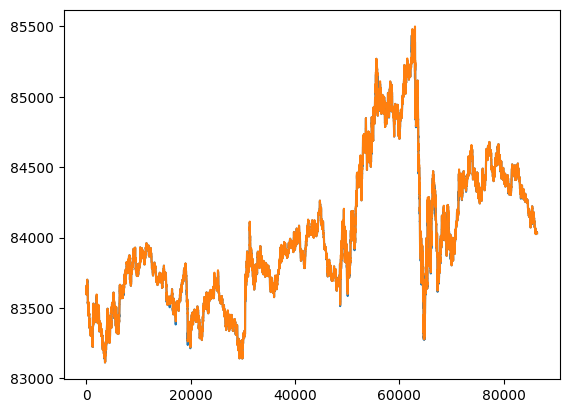

In [10]:
df_BTC.open_time

df_BTC.low.plot()
df_BTC.high.plot()



df_BTC['date_time'] = pd.to_datetime(df['open_time'], unit='us')
df_BTC.index = df_BTC.date_time
display(df_BTC)

<Axes: xlabel='date_time'>

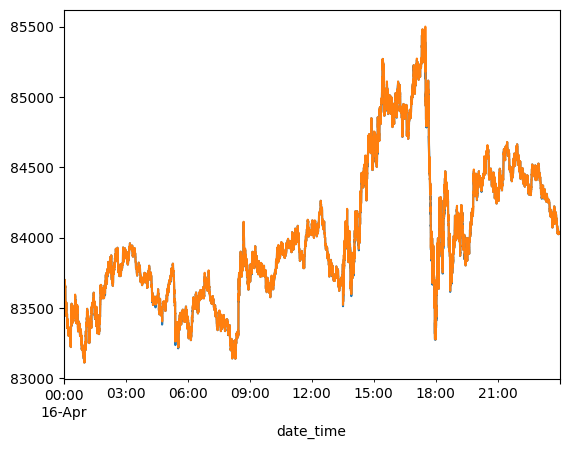

In [ ]:
df_BTC.low.plot()
df_BTC.high.plot()

In [ ]:
bet_time = df_BTC.between_time('12:00', '12:05')


for price in df_BTC.close:
  
bet_time.close



bet_time.high.plot(style="rv")
bet_time.low.plot(style="b^")

IndentationError: expected an indented block after 'for' statement on line 4 (1596250490.py, line 6)

In [ ]:
df_BTC.close.head(15)

0     83636.31
1     83636.30
2     83636.31
3     83636.30
4     83621.01
5     83621.01
6     83621.01
7     83620.46
8     83620.46
9     83620.46
10    83620.44
11    83620.45
12    83620.44
13    83620.45
14    83620.44
Name: close, dtype: float64

In [ ]:
df_BTC.close.pct_change(300).head(10)

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
6   NaN
7   NaN
8   NaN
9   NaN
Name: close, dtype: float64

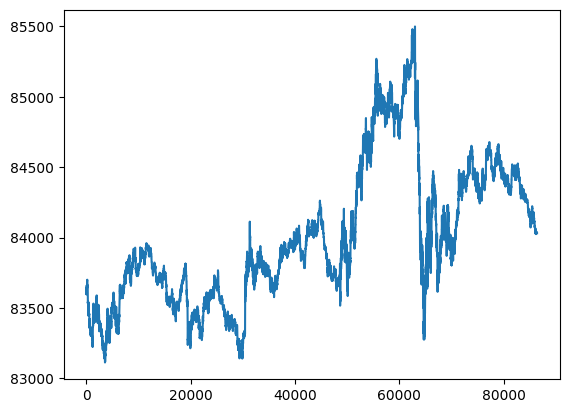

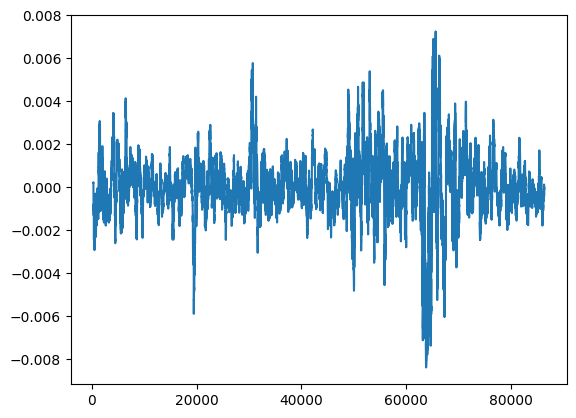

In [ ]:
df_BTC.close.plot()
plt.show()
df_BTC.close.pct_change(300).plot()
plt.show()

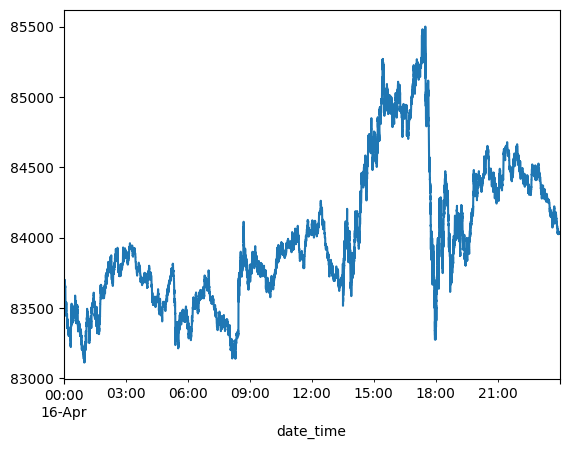

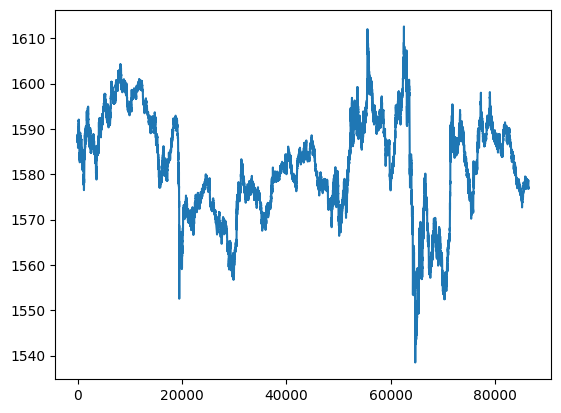

In [16]:
df_BTC.close.plot()
plt.show()
df_ETH.close.plot()
plt.show()

In [20]:
df_BTC.close.percent_change(300) / df_ETH.close.percent_change(300)

AttributeError: 'Series' object has no attribute 'percent_change'